<a href="https://colab.research.google.com/github/V-AISHVARYA/LGMVIP-DataScience-Task-3/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LGMVIP TASK3:
**Music Recommendation::**

Music recommender systems can suggest songs to users based on their listening patterns.  
~Aishvarya.V

## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Reading the dataset

In [ ]:
songs_data = pd.read_csv("songs.csv")
songs_extra_info =  pd.read_csv("song_extra_info.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
members_data = pd.read_csv("members.csv")
sample_submission_data = pd.read_csv("sample_submission.csv")

### Displaying all the datasets

In [ ]:
songs_data

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
21094,1ZZ3b/6E/YKCVXQX/Dhm8z6rKex4Y9CNXrdVq6rZ1js=,255930,NaN,高勝美 (Malas Kao),NaN,NaN,10.0
21095,Fd8PHwBwae09uJRqRGDCQrJd/oFFZWjsok/td43f7HU=,141130,465,Rosie Thomas,NaN,NaN,52.0
21096,5RuX0Iwkl7lT/YBeRYlg/aeJIyI6oxDR3UxkZsLWUZE=,333577,873,蓮歌子,NaN,NaN,-1.0
21097,remCmEZfq5kwrepmbddZbVsdkGM/1wCryhIoEs031N8=,238840,465,何俊明 橘子作品,何俊明,何俊明,3.0


In [ ]:
songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
27240,E9s10C4WWBfcyY9HpWPwyOL2ZpfVOqDtfohOtBh00PQ=,Run Away,TCAAS1055631
27241,jKRt2w/Zkrmd+0w6qCmnMPbwlRYDAd+TOkhC14WUjbA=,沒有泥土那有花,NaN
27242,ehGmQ+DRzZgqoE3dm+yNyXxntFvu10MnD/O3pJaE+ck=,Sleep Talking,TWA531300614
27243,i3pPrO9kgELunLzg0u7lzzWn6RfD/I7h5jb0V+ZVNXo=,Winter Wonderland,USSM10110540


In [ ]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
15559,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,TIwOs7iFTKo3Cy2yiNReYYcZc1JyAx+0k08+z97k1dA=,my library,Local playlist more,local-playlist,1.0
15560,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,q5/Vwifgv0SGdEIyiMU2F0pIXkeCIW3w2xB8n4iMoS0=,my library,Local playlist more,local-playlist,0.0
15561,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,B2jGIdcFp/C/jeFaJdOwrw72q0kEetFFo+fReLkd6o0=,my library,Local playlist more,local-playlist,1.0
15562,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,Tk7vkd8yZqpi6MGiK391iqbpTFVcDizMM8p4NQhw0C8=,my library,Local playlist more,local-playlist,1.0


In [ ]:
test_data

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
15568,15568,zI5Rfk+p2mE5J1fvbBZrBW/k5kLQbHFvcsJ7MXGni5U=,9YYrODwrXpDcCjOJypHROv3f5z40y11QlmgQjmzp2vQ=,my library,Local playlist more,local-library
15569,15569,pzs6AnaFO4XJHdPBPCMNFJvy1flQQZc4nhqSnuqz8Ck=,SBwd5i/r8VSf3fLkj+3mrS21VCcJ/15K/1YD30YtrsQ=,discover,Online playlist more,song-based-playlist
15570,15570,pzs6AnaFO4XJHdPBPCMNFJvy1flQQZc4nhqSnuqz8Ck=,7qZxry/TAs61Lfl4VddWOlUQozGg7ajEYbZL/XGyPcY=,discover,Online playlist more,song-based-playlist
15571,15571,pzs6AnaFO4XJHdPBPCMNFJvy1flQQZc4nhqSnuqz8Ck=,gISSoKOTOr7y6bnOwHjI5NZcXJSo3ixxFF0aW3Je2C0=,discover,Online playlist more,song-based-playlist


In [ ]:
members_data

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [ ]:
sample_submission_data

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
200746,200746,0.5
200747,200747,0.5
200748,200748,0.5
200749,200749,0.5


### Displaying the shape

In [ ]:
print(f"The songs_data has {songs_data.shape[0]} rows and {songs_data.shape[1]} columns")
print(f"The songs_extra_info_data  has {songs_extra_info.shape[0]} rows and {songs_extra_info.shape[1]} columns")
print(f"The members_data has {members_data.shape[0]} rows and {members_data.shape[1]} columns")
print(f"The sample_submission_data  has {sample_submission_data.shape[0]} rows and {sample_submission_data.shape[1]} columns")
print(f"The train_data has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test_data has {test_data.shape[0]} rows and {test_data.shape[1]} columns")



The songs_data has 21099 rows and 7 columns
The songs_extra_info_data  has 27245 rows and 3 columns
The members_data has 34403 rows and 7 columns
The sample_submission_data  has 200751 rows and 2 columns
The train_data has 15564 rows and 6 columns
The test_data has 15573 rows and 6 columns


# EDA on Songs dataset

In [ ]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
print(f"Number of records : {songs_data.shape[0]}")
print(f"Count of distinct song lengths : {len(songs_data.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs_data.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs_data.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs_data.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs_data.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs_data.language.unique())}")


Number of records : 21099
Count of distinct song lengths : 11106
Count of distinct genre ids : 283
Count of distinct artist name : 8622
Count of distinct composer : 8732
Count of distinct lyricist : 4175
Count of distinct languages : 11


In [ ]:
songs_data.describe()

,song_length,language
count,2.109900e+04,21098.000000
mean,2.454255e+05,25.944781
std,1.192621e+05,23.212059
min,4.922000e+03,-1.000000
25%,1.999700e+05,3.000000
50%,2.336390e+05,17.000000
75%,2.729275e+05,52.000000
max,4.025318e+06,59.000000


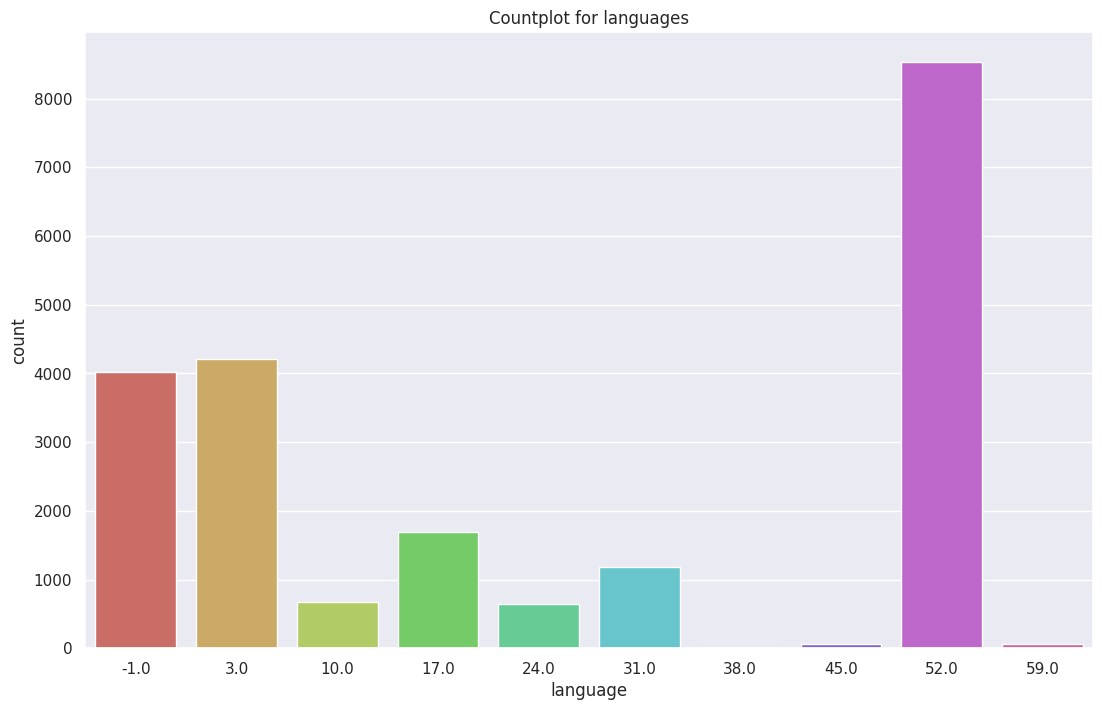

In [ ]:
plt.figure(figsize = (13, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs_data.language, data = songs_data.language,palette="hls",)
ax.set_title("Countplot for languages")
plt.show()


<ipython-input-140-8ae79b95b58f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(songs_data.song_length/60000, color='r')


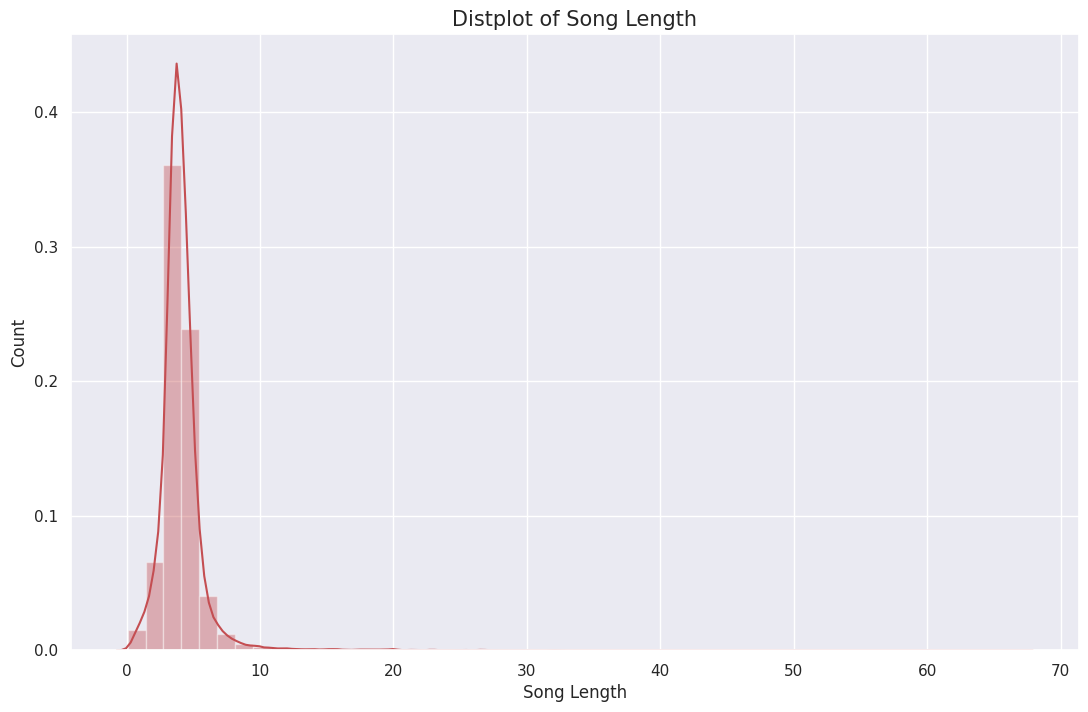

In [ ]:
plt.figure(figsize=(13, 8))
sns.set_style("darkgrid")
ax = sns.distplot(songs_data.song_length/60000, color='r')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

In [ ]:
songs_data.isnull().sum()

song_id            0
song_length        0
genre_ids        362
artist_name        0
composer        8808
lyricist       15093
language           1
dtype: int64

In [ ]:
songs_data.genre_ids.value_counts()

465                8410
1609               1244
2022               1112
921                 873
958                 827
                   ... 
465|2189|367          1
786|139|125|109       1
972                   1
2032                  1
786|947|726           1
Name: genre_ids, Length: 282, dtype: int64

In [ ]:
songs_data['genre_ids'].fillna('465',inplace=True)

In [ ]:
songs_data['language'].value_counts()

 52.0    8539
 3.0     4211
-1.0     4017
 17.0    1689
 31.0    1189
 10.0     674
 24.0     645
 59.0      69
 45.0      58
 38.0       7
Name: language, dtype: int64

In [ ]:
songs_data['language'].fillna(52.0,inplace=True)

In [ ]:
songs_data.drop(['composer'], axis =1, inplace=True)
songs_data.drop(['lyricist'], axis =1, inplace=True)

In [ ]:
songs_data.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
language       0
dtype: int64

In [ ]:
songs_data

,song_id,song_length,genre_ids,artist_name,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,52.0
...,...,...,...,...,...
21094,1ZZ3b/6E/YKCVXQX/Dhm8z6rKex4Y9CNXrdVq6rZ1js=,255930,465,高勝美 (Malas Kao),10.0
21095,Fd8PHwBwae09uJRqRGDCQrJd/oFFZWjsok/td43f7HU=,141130,465,Rosie Thomas,52.0
21096,5RuX0Iwkl7lT/YBeRYlg/aeJIyI6oxDR3UxkZsLWUZE=,333577,873,蓮歌子,-1.0
21097,remCmEZfq5kwrepmbddZbVsdkGM/1wCryhIoEs031N8=,238840,465,何俊明 橘子作品,3.0


# EDA on songs_extra_info dataset

In [ ]:
print("Columns present in the songs_extra_info are:")
for columns in songs_extra_info.columns:
    print(columns)

Columns present in the songs_extra_info are:
song_id
name
isrc


In [ ]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
songs_extra_info.isnull().sum()

song_id       0
name          1
isrc       3666
dtype: int64

In [ ]:
songs_extra_info.drop('isrc', axis = 1, inplace = True)

# EDA on member dataset

In [ ]:
print("Columns present in the members_data are:")
for columns in members_data.columns:
    print(columns)

Columns present in the members_data are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


In [ ]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


Text(0.5, 1.0, 'Count plot for gender')

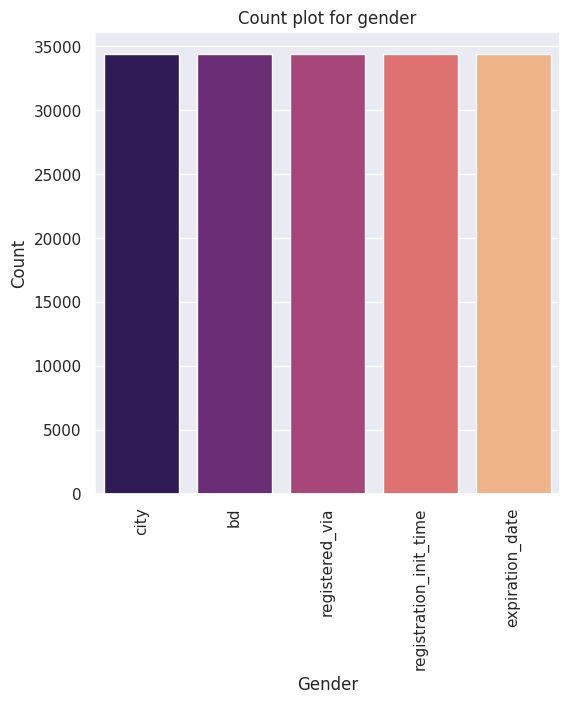

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot( members_data, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.title('Count plot for gender')

In [ ]:
members_data.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
members_data.fillna('male', inplace = True)

In [ ]:
members_data.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

Text(0.5, 1.0, 'Count plot for Registation Method')

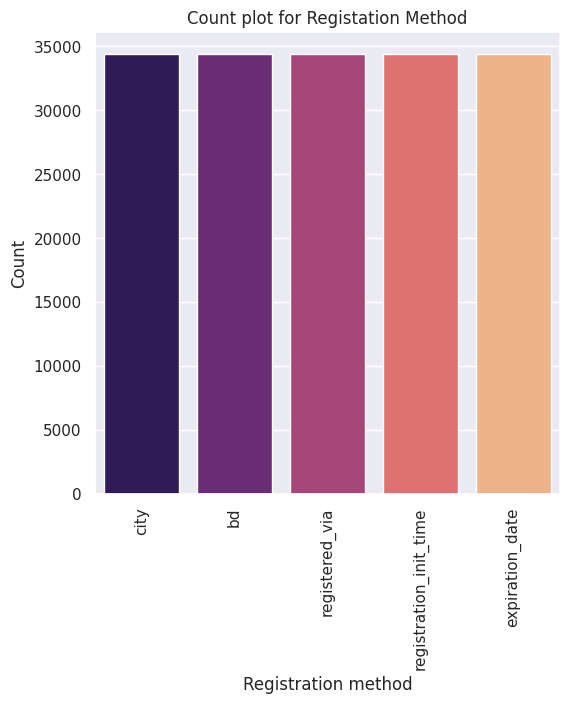

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot( data=members_data, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.title('Count plot for Registation Method')

# EDA on Training set

In [ ]:
print(f"Total number of records : {train_data.shape[0]}")

Total number of records : 15564


Text(0.5, 1.0, 'Count plot for system tab there are using')

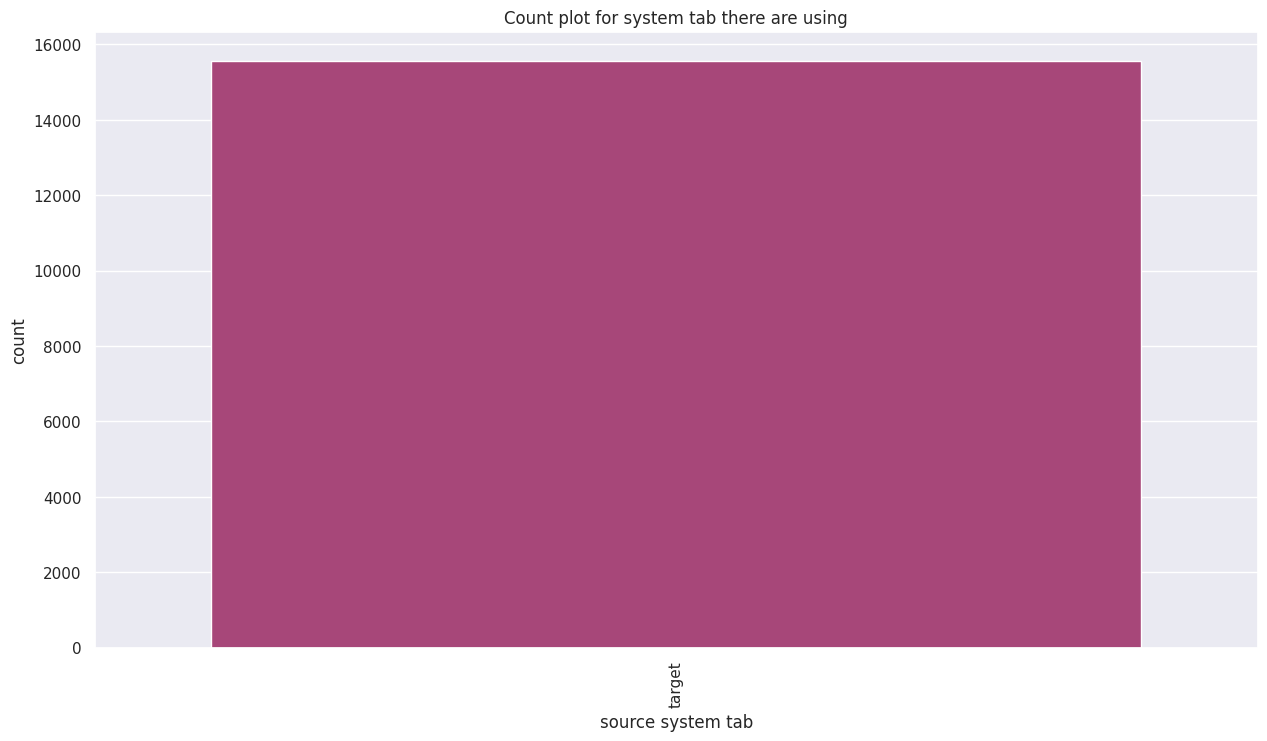

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_data, palette = 'magma')
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.title('Count plot for system tab there are using')

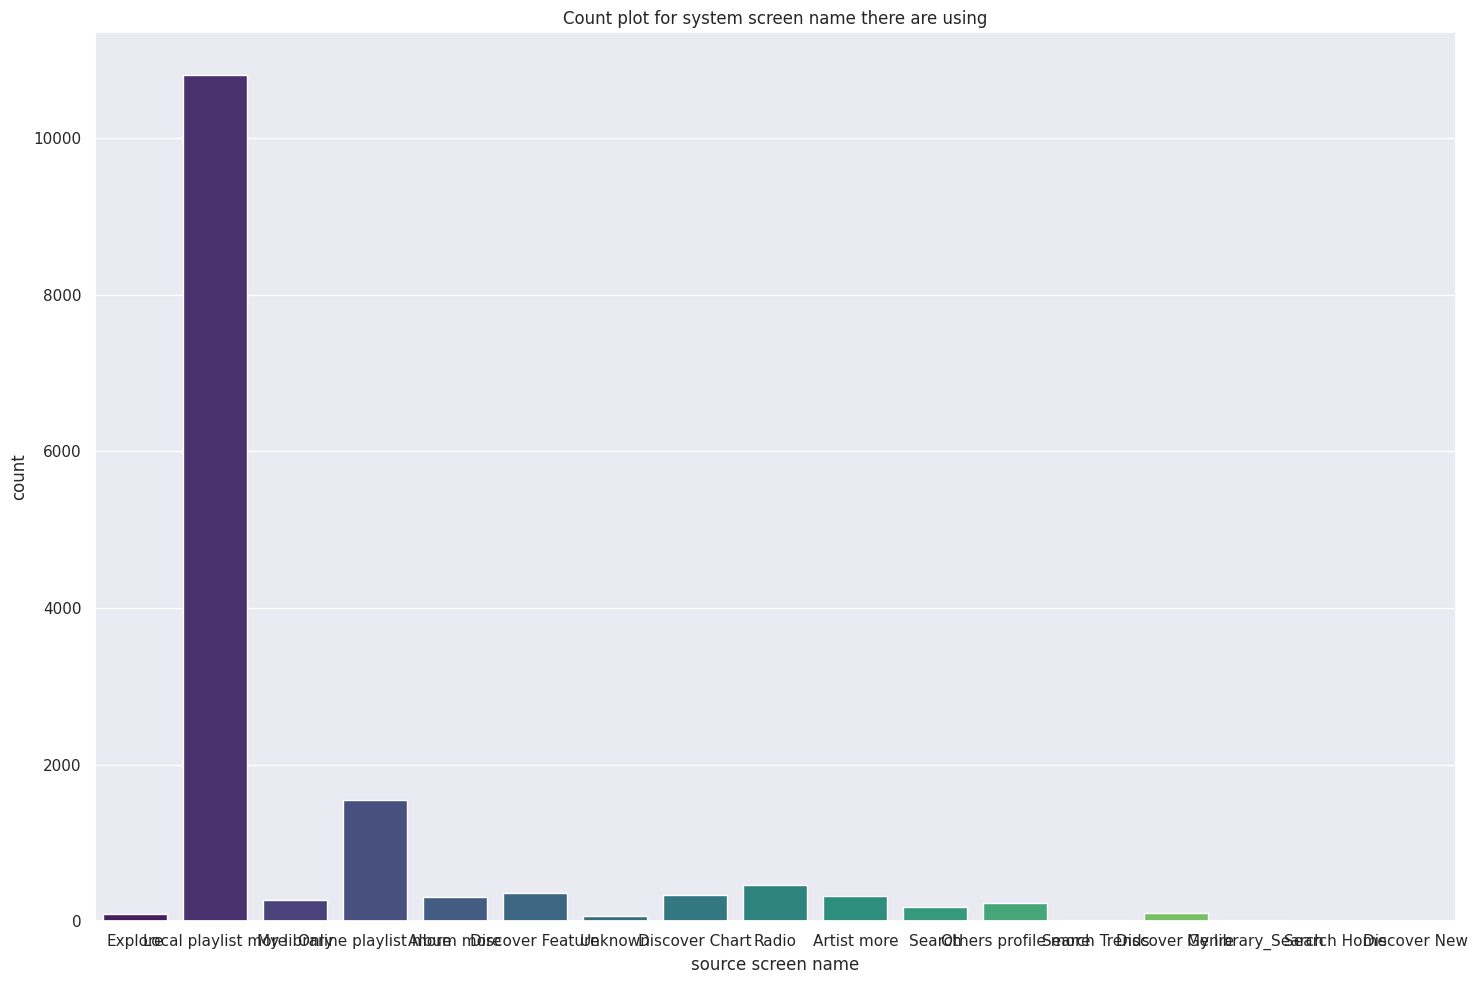

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_data['source_screen_name']  , palette = 'viridis')
sns.set(style="darkgrid")
plt.xlabel('source screen name')
plt.ylabel('count')
plt.xticks(rotation='horizontal')
plt.title('Count plot for system screen name there are using')
plt.tight_layout()

In [ ]:
print("Total percentage for NaN value in target column  : ",(train_data["target"].isna().sum()/len(train_data["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.00642508352608584 %


In [ ]:
duplicate_values = len(train_data["msno"])-train_data["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train_data["msno"]))*100,"%")

Total no of duplicate user id         :  13421
Total percentage of duplicate user id :  86.23104600359804 %


In [ ]:
duplicate_values1 = len(train_data["song_id"])-train_data["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train_data["song_id"]))*100,"%")

Total no of duplicate song id         :  7579
Total percentage of duplicate song id :  48.69570804420457 %


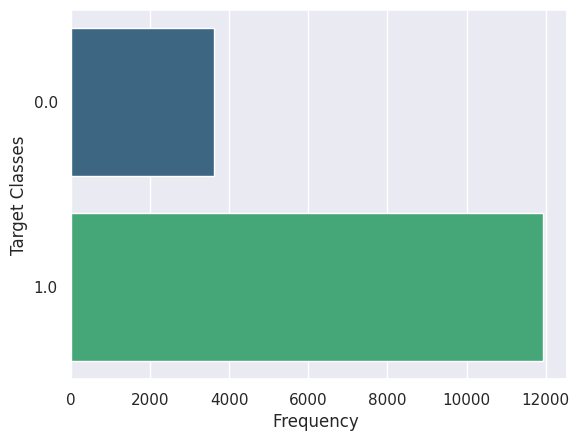

In [ ]:
sns.countplot(y=train_data['target'],data=train_data, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

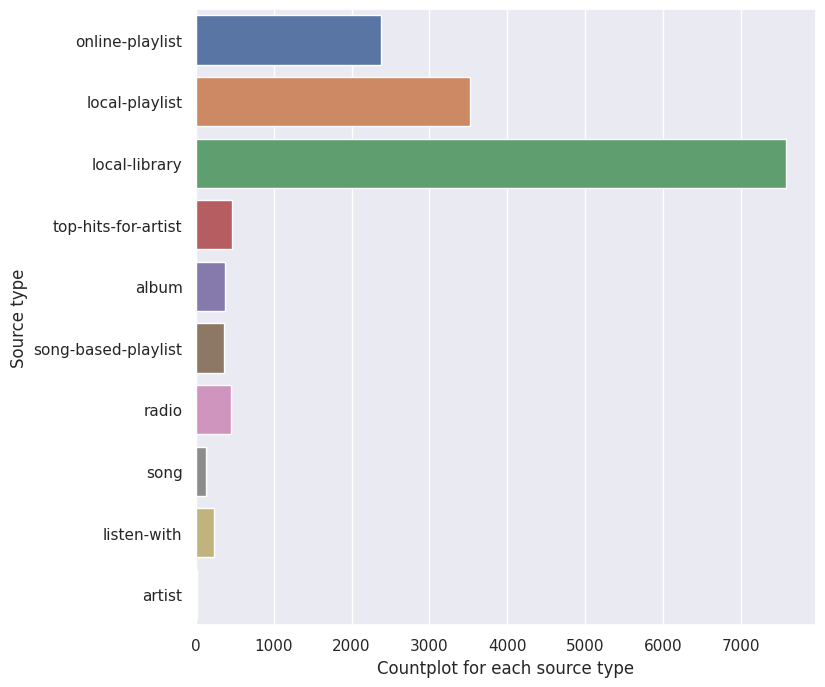

In [ ]:
plt.figure(figsize = (8,8))
sns.countplot(y=train_data['source_type'],data=train_data)
plt.ylabel('Source type')
plt.xlabel('Countplot for each source type')
plt.show()

In [ ]:
train_data.isnull().sum()

msno                    0
song_id                 1
source_system_tab      50
source_screen_name    452
source_type            43
target                  1
dtype: int64

In [ ]:
train_data['source_system_tab'].fillna('my library',inplace=True)
train_data['source_type'].fillna('local-library',inplace=True)
train_data['source_screen_name'].fillna('Local playlist',inplace=True)

In [ ]:
train_data.isnull().sum()

msno                  0
song_id               1
source_system_tab     0
source_screen_name    0
source_type           0
target                1
dtype: int64

In [ ]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
15559,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,TIwOs7iFTKo3Cy2yiNReYYcZc1JyAx+0k08+z97k1dA=,my library,Local playlist more,local-playlist,1.0
15560,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,q5/Vwifgv0SGdEIyiMU2F0pIXkeCIW3w2xB8n4iMoS0=,my library,Local playlist more,local-playlist,0.0
15561,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,B2jGIdcFp/C/jeFaJdOwrw72q0kEetFFo+fReLkd6o0=,my library,Local playlist more,local-playlist,1.0
15562,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,Tk7vkd8yZqpi6MGiK391iqbpTFVcDizMM8p4NQhw0C8=,my library,Local playlist more,local-playlist,1.0


# Displaying information about the Test Dataset and Sample Submission Dataset

In [ ]:
print("Columns present in the test_data are:")
for columns in test_data.columns:
    print(columns)

Columns present in the test_data are:
id
msno
song_id
source_system_tab
source_screen_name
source_type


In [ ]:
print("Columns present in the sample_submission_data are:")
for columns in sample_submission_data.columns:
    print(columns)

Columns present in the sample_submission_data are:
id
target


# Merging the datasets

In [ ]:
merged_songs = pd.merge(songs_data, songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(train_data, members_data, on ='msno' ,how='left')
train_data = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [ ]:
train_data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,0.0,male,7.0,20120102.0,20171005.0,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,1.0,0.0,male,7.0,20120102.0,20171005.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15559,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,TIwOs7iFTKo3Cy2yiNReYYcZc1JyAx+0k08+z97k1dA=,my library,Local playlist more,local-playlist,1.0,5.0,0.0,male,9.0,20150926.0,20171106.0,NaN,NaN,NaN,NaN,NaN
15560,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,q5/Vwifgv0SGdEIyiMU2F0pIXkeCIW3w2xB8n4iMoS0=,my library,Local playlist more,local-playlist,0.0,5.0,0.0,male,9.0,20150926.0,20171106.0,NaN,NaN,NaN,NaN,NaN
15561,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,B2jGIdcFp/C/jeFaJdOwrw72q0kEetFFo+fReLkd6o0=,my library,Local playlist more,local-playlist,1.0,5.0,0.0,male,9.0,20150926.0,20171106.0,NaN,NaN,NaN,NaN,NaN
15562,3GVGdzML5qaZqpwoSElJrTJKPZC1e1wi00zeeRO8Ha0=,Tk7vkd8yZqpi6MGiK391iqbpTFVcDizMM8p4NQhw0C8=,my library,Local playlist more,local-playlist,1.0,5.0,0.0,male,9.0,20150926.0,20171106.0,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing & Label Encoding

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15564 entries, 0 to 15563
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    15564 non-null  object 
 1   song_id                 15563 non-null  object 
 2   source_system_tab       15564 non-null  object 
 3   source_screen_name      15564 non-null  object 
 4   source_type             15564 non-null  object 
 5   target                  15563 non-null  float64
 6   city                    15563 non-null  float64
 7   bd                      15563 non-null  float64
 8   gender                  15563 non-null  object 
 9   registered_via          15563 non-null  float64
 10  registration_init_time  15563 non-null  float64
 11  expiration_date         15563 non-null  float64
 12  song_length             1244 non-null   float64
 13  genre_ids               1244 non-null   object 
 14  artist_name             1244 non-null 

In [ ]:
train_data.drop(['msno'], axis = 1, inplace=True)
train_data.drop(['song_id'], axis = 1, inplace=True)

In [ ]:
df = train_data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [ ]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids

In [ ]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
0,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,NaN,42,393,NaN,53
1,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,42,393,NaN,53
2,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,42,393,NaN,53
3,3,8,4,1.0,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,42,393,NaN,53
4,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,NaN,42,393,NaN,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15559,3,8,4,1.0,5.0,0.0,1,9.0,20150926.0,20171106.0,NaN,42,393,NaN,53
15560,3,8,4,0.0,5.0,0.0,1,9.0,20150926.0,20171106.0,NaN,42,393,NaN,53
15561,3,8,4,1.0,5.0,0.0,1,9.0,20150926.0,20171106.0,NaN,42,393,NaN,53
15562,3,8,4,1.0,5.0,0.0,1,9.0,20150926.0,20171106.0,NaN,42,393,NaN,53


In [ ]:
df.isnull().sum()

source_system_tab             0
source_screen_name            0
source_type                   0
target                        1
city                          1
bd                            1
gender                        0
registered_via                1
registration_init_time        1
expiration_date               1
song_length               14320
genre_ids                     0
artist_name                   0
language                  14320
name                          0
dtype: int64

In [ ]:
df.dropna(subset = ['genre_ids', 'song_length', 'language'], inplace = True)

In [ ]:
df

,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,language,name
5,1,6,5,1.0,1.0,0.0,1,7.0,20120102.0,20171005.0,247803.0,2,51,52.0,53
47,3,8,4,1.0,1.0,0.0,1,7.0,20130925.0,20171001.0,249443.0,17,333,3.0,53
51,3,8,4,1.0,1.0,0.0,1,7.0,20130925.0,20171001.0,219324.0,17,223,3.0,53
62,0,3,5,1.0,1.0,0.0,1,7.0,20130820.0,20170930.0,262164.0,17,235,3.0,53
70,3,8,3,1.0,5.0,32.0,0,4.0,20160623.0,20170925.0,275121.0,16,372,3.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15527,5,13,6,0.0,5.0,41.0,1,7.0,20130909.0,20170923.0,276035.0,14,111,31.0,53
15532,3,8,3,1.0,13.0,23.0,1,4.0,20160608.0,20170915.0,233360.0,19,104,52.0,53
15540,3,8,3,1.0,13.0,0.0,1,3.0,20131004.0,20180126.0,226220.0,17,202,3.0,53
15550,3,7,3,1.0,5.0,0.0,1,9.0,20150926.0,20171106.0,266240.0,19,342,3.0,53


In [ ]:
df.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
dtype: int64

In [ ]:
df.to_csv('preprocessed_data2.csv')

In [ ]:
df1 = df[0:30000]

# Model Building and Evaluation

In [ ]:
Y = df1.target
X = df1.drop('target', axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

(933, 14)

In [ ]:
X_test.shape

(311, 14)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

## Model Evaluation

In [ ]:
print ("Accuracy is :", accuracy_score(Y_test, pred)*100)
print ("\nConfusion matrix :\n",confusion_matrix(Y_test, pred))

Accuracy is : 79.7427652733119

Confusion matrix :
 [[ 17  53]
 [ 10 231]]


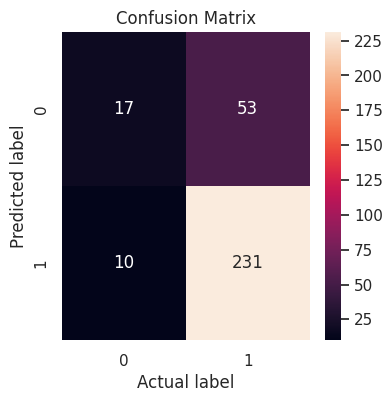

In [ ]:
plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(Y_test, pred), annot = True, fmt = 'g')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
pred_prob = rfc.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresh = roc_curve(Y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(Y_test, pred_prob[:,1])

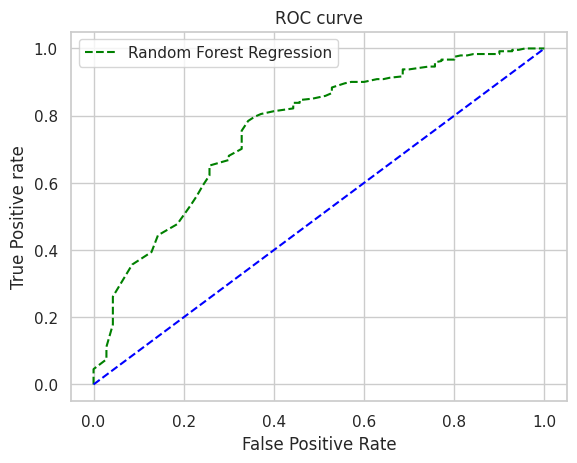

In [ ]:
sns.set_style('whitegrid')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='Random Forest Regression')
#plt.plot(thresh, linestyle='--', color='blue')
plt.plot([0, 1], ls="--", color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();

# Thank You!